In [1]:
from sklearn.model_selection import train_test_split

from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv(r'C:\Users\User\Desktop\creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.duplicated().sum()

1081

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
abs(data.corr()['Class'])*100

Time        1.235934
V1          9.448583
V2          8.462445
V3         18.232225
V4         12.932583
V5          8.781244
V6          4.391541
V7         17.234653
V8          3.306802
V9          9.402129
V10        20.697124
V11        14.906710
V12        25.071118
V13         0.389696
V14        29.337538
V15         0.329956
V16        18.718605
V17        31.349827
V18        10.533972
V19         3.363115
V20         2.148634
V21         2.635744
V22         0.488723
V23         0.633321
V24         0.721013
V25         0.320249
V26         0.426458
V27         2.189211
V28         0.968243
Amount      0.577702
Class     100.000000
Name: Class, dtype: float64

In [9]:
sum(abs(data.corr()['Class'])*100)/len(abs(data.corr()['Class'])*100)

11.588228983686136

In [10]:
data = data.drop(data[['Amount','V19','V20','V21','V22','V23',
                       'V24','V25','V26','V27','V28','V1','V2','V5','V6','V8','V9','V13','V15','Time']],axis=1)

In [11]:
data.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0


In [12]:
data.columns

Index(['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'Class'],
      dtype='object')

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [14]:
vif

,VIF,Features
0,1.000402,V3
1,1.000093,V4
2,1.000554,V7
3,1.000431,V10
4,1.000194,V11
5,1.000517,V12
6,1.000495,V14
7,1.000367,V16
8,1.000762,V17
9,1.000143,V18


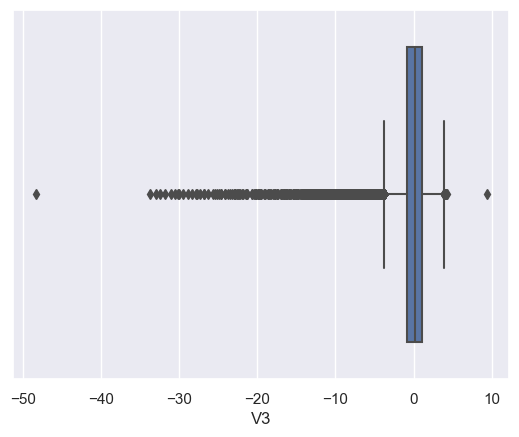

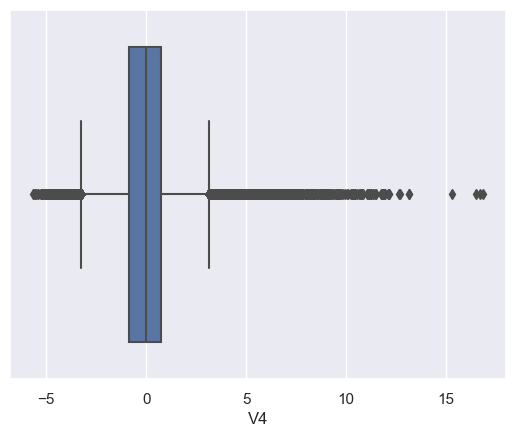

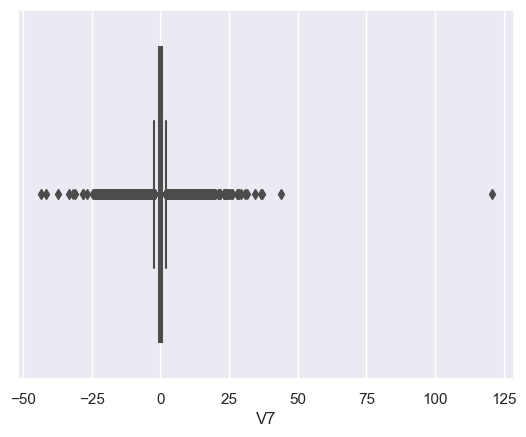

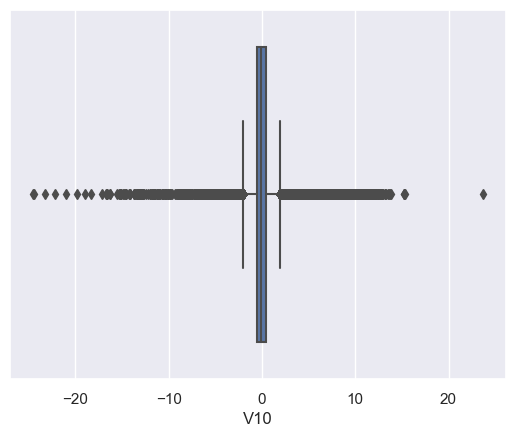

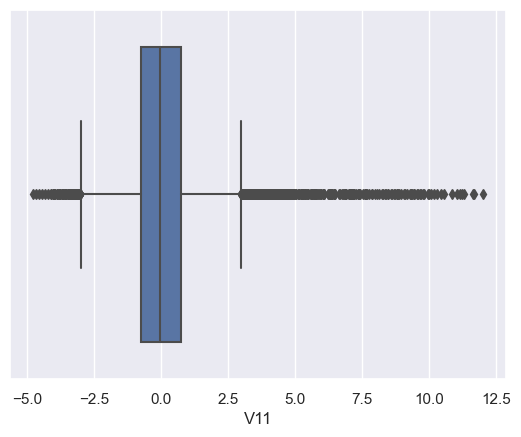

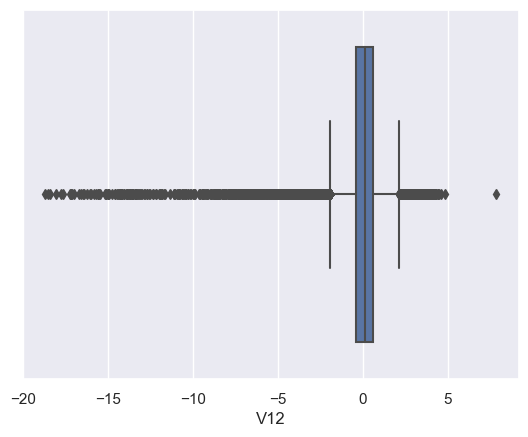

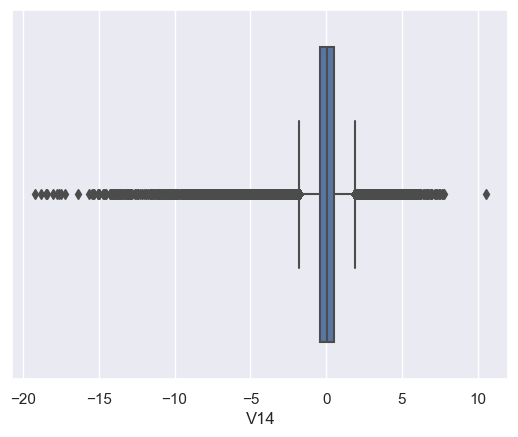

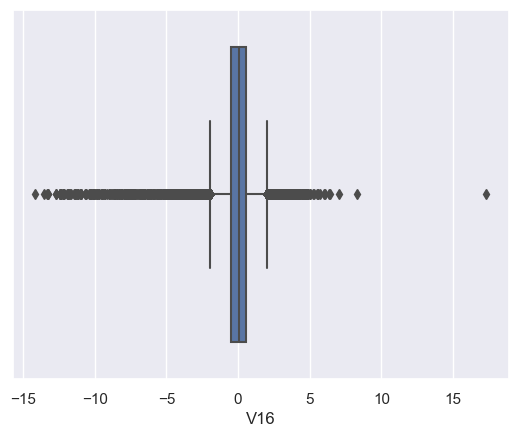

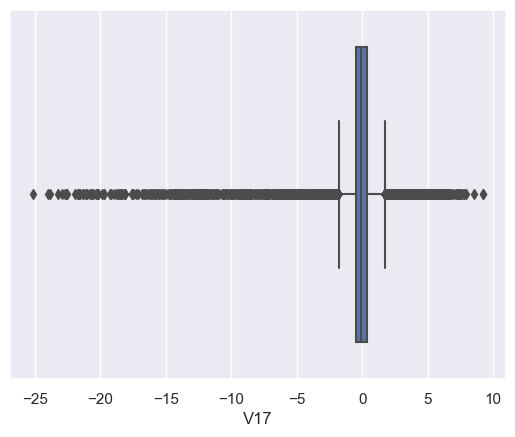

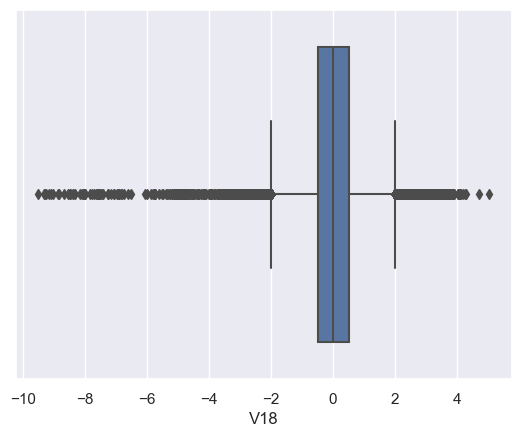

In [15]:
for i in data[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [16]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1
Upper = q3+1.5*IQR
Lower = q1-1.5*IQR

In [17]:
for i in data[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

In [18]:
X = data[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']]
y = data['Class']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Logistic Regression

In [20]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [23]:
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 93.40622940788855
[[56650     6]
 [   25    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.72      0.81        90

    accuracy                           1.00     56746
   macro avg       0.96      0.86      0.90     56746
weighted avg       1.00      1.00      1.00     56746



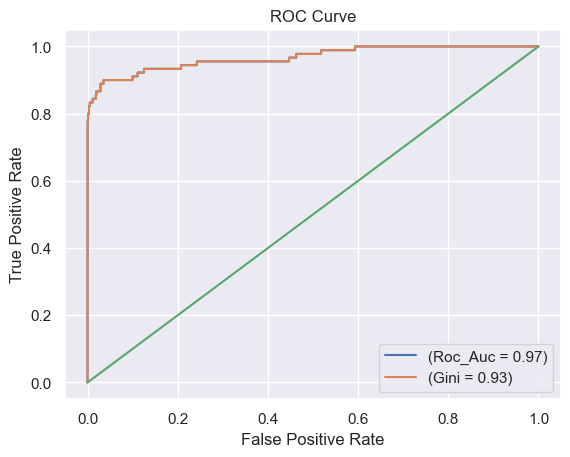

In [24]:
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Radom Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
evaluate(rfc, X_test, y_test)

Model Performance
Gini prob is 82.95202626376732
[[56649     7]
 [   25    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.90      0.72      0.80        90

    accuracy                           1.00     56746
   macro avg       0.95      0.86      0.90     56746
weighted avg       1.00      1.00      1.00     56746



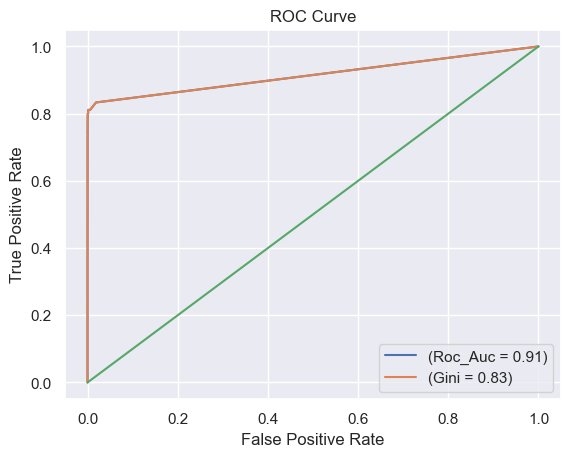

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = rfc.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Random Forest Optimized

In [29]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [30]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 1, cv = 2, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [31]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70}

In [32]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is 91.41316796887257
[[56649     7]
 [   25    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.90      0.72      0.80        90

    accuracy                           1.00     56746
   macro avg       0.95      0.86      0.90     56746
weighted avg       1.00      1.00      1.00     56746



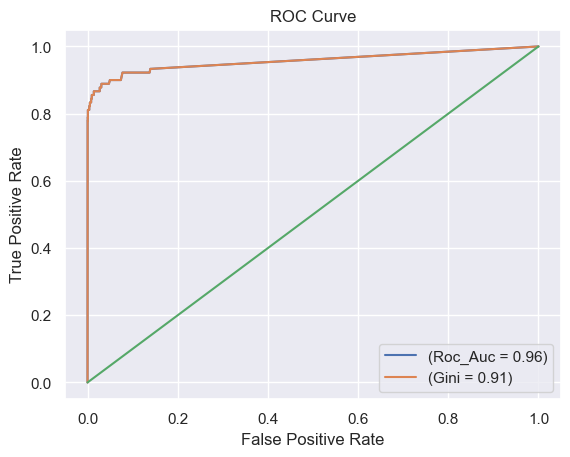

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Support Vector

In [34]:
from sklearn import svm

In [35]:
base_model = svm.SVC(probability=True)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Gini prob is 77.16093617622141
[[56647     9]
 [   22    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.88      0.76      0.81        90

    accuracy                           1.00     56746
   macro avg       0.94      0.88      0.91     56746
weighted avg       1.00      1.00      1.00     56746



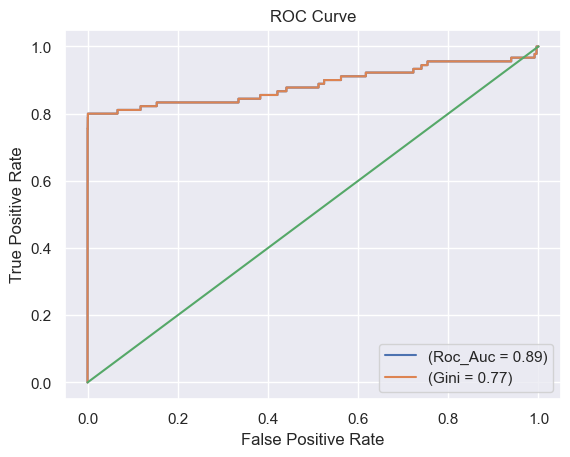

In [36]:
 from sklearn.metrics import roc_curve

y_prob_test = base_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob_test)
gini = (2*roc_auc_score(y_test, y_prob_test))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Support Vector Optimized

In [37]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['poly', 'rbf', 'sigmoid']

gamma = ['scale', 'auto'] 

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]

random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [38]:
svc_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=1, n_jobs = -1)
svc_random.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=SVC(probability=True), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   verbose=1)

In [39]:
svc_random.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 10}

In [40]:
optimized_model = svc_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
Gini prob is 81.19412673758197
[[56649     7]
 [   23    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.74      0.82        90

    accuracy                           1.00     56746
   macro avg       0.95      0.87      0.91     56746
weighted avg       1.00      1.00      1.00     56746



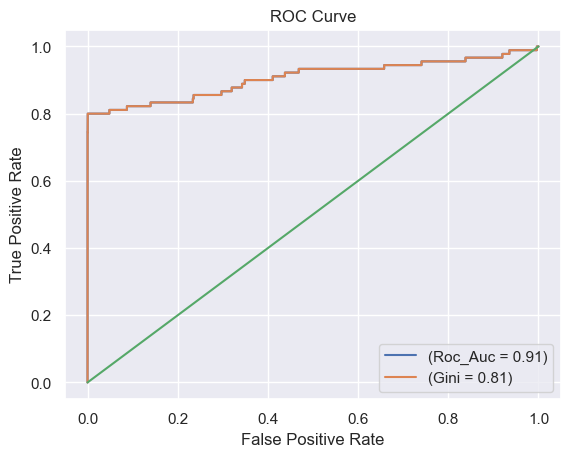

In [41]:
from sklearn.metrics import roc_curve

y_prob_test = optimized_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob_test)
gini = (2*roc_auc_score(y_test, y_prob_test))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Catboost

In [42]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [43]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train,y_train)

Learning rate set to 0.104458
0:	learn: 0.3552498	total: 218ms	remaining: 3m 38s
1:	learn: 0.1768111	total: 253ms	remaining: 2m 6s
2:	learn: 0.0920296	total: 287ms	remaining: 1m 35s
3:	learn: 0.0506024	total: 320ms	remaining: 1m 19s
4:	learn: 0.0300034	total: 353ms	remaining: 1m 10s
5:	learn: 0.0184062	total: 391ms	remaining: 1m 4s
6:	learn: 0.0123603	total: 427ms	remaining: 1m
7:	learn: 0.0088751	total: 463ms	remaining: 57.4s
8:	learn: 0.0067953	total: 495ms	remaining: 54.5s
9:	learn: 0.0055058	total: 529ms	remaining: 52.3s
10:	learn: 0.0046785	total: 561ms	remaining: 50.5s
11:	learn: 0.0041868	total: 595ms	remaining: 49s
12:	learn: 0.0038028	total: 627ms	remaining: 47.6s
13:	learn: 0.0035657	total: 659ms	remaining: 46.4s
14:	learn: 0.0033897	total: 694ms	remaining: 45.6s
15:	learn: 0.0032287	total: 729ms	remaining: 44.9s
16:	learn: 0.0031283	total: 762ms	remaining: 44.1s
17:	learn: 0.0030367	total: 795ms	remaining: 43.4s
18:	learn: 0.0029640	total: 828ms	remaining: 42.7s
19:	learn: 0

In [44]:
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

Learning rate set to 0.104458
0:	learn: 0.3552498	total: 43ms	remaining: 43s
1:	learn: 0.1768111	total: 91.7ms	remaining: 45.7s
2:	learn: 0.0920296	total: 136ms	remaining: 45.3s
3:	learn: 0.0506024	total: 181ms	remaining: 45s
4:	learn: 0.0300034	total: 230ms	remaining: 45.8s
5:	learn: 0.0184062	total: 280ms	remaining: 46.4s
6:	learn: 0.0123603	total: 322ms	remaining: 45.7s
7:	learn: 0.0088751	total: 360ms	remaining: 44.6s
8:	learn: 0.0067953	total: 398ms	remaining: 43.8s
9:	learn: 0.0055058	total: 434ms	remaining: 42.9s
10:	learn: 0.0046785	total: 469ms	remaining: 42.2s
11:	learn: 0.0041868	total: 506ms	remaining: 41.6s
12:	learn: 0.0038028	total: 541ms	remaining: 41.1s
13:	learn: 0.0035657	total: 576ms	remaining: 40.6s
14:	learn: 0.0033897	total: 617ms	remaining: 40.5s
15:	learn: 0.0032287	total: 652ms	remaining: 40.1s
16:	learn: 0.0031283	total: 690ms	remaining: 39.9s
17:	learn: 0.0030367	total: 730ms	remaining: 39.8s
18:	learn: 0.0029640	total: 768ms	remaining: 39.7s
19:	learn: 0.00

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_catboost = evaluate(catboost_model, X_test, y_test)

Model Performance
Gini prob is 92.3878024098654
[[56646    10]
 [   24    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.87      0.73      0.80        90

    accuracy                           1.00     56746
   macro avg       0.93      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



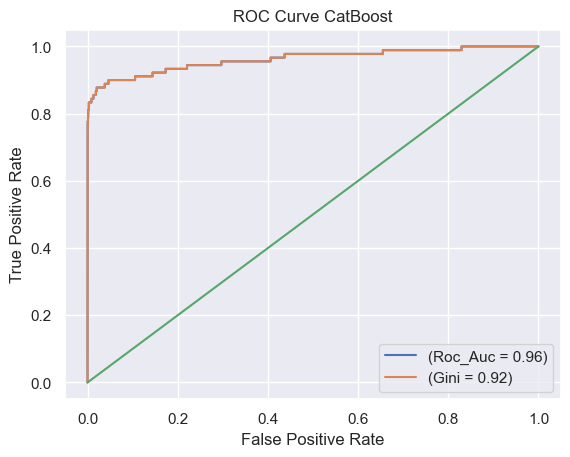

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

# Catboost Optimized

In [47]:
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7),}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [48]:
random_search_cb = RandomizedSearchCV(cb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_cb.fit(X_train, y_train)

0:	learn: 0.6556356	total: 27.9ms	remaining: 27.8s
1:	learn: 0.6191105	total: 54.6ms	remaining: 27.2s
2:	learn: 0.5875836	total: 83.3ms	remaining: 27.7s
3:	learn: 0.5544949	total: 110ms	remaining: 27.5s
4:	learn: 0.5244171	total: 137ms	remaining: 27.3s
5:	learn: 0.4959741	total: 166ms	remaining: 27.5s
6:	learn: 0.4685215	total: 195ms	remaining: 27.7s
7:	learn: 0.4434424	total: 225ms	remaining: 27.9s
8:	learn: 0.4197249	total: 270ms	remaining: 29.7s
9:	learn: 0.3955775	total: 306ms	remaining: 30.3s
10:	learn: 0.3721593	total: 336ms	remaining: 30.2s
11:	learn: 0.3501453	total: 364ms	remaining: 29.9s
12:	learn: 0.3336079	total: 391ms	remaining: 29.7s
13:	learn: 0.3158312	total: 418ms	remaining: 29.5s
14:	learn: 0.2981198	total: 447ms	remaining: 29.3s
15:	learn: 0.2830182	total: 476ms	remaining: 29.3s
16:	learn: 0.2670392	total: 506ms	remaining: 29.2s
17:	learn: 0.2511015	total: 534ms	remaining: 29.2s
18:	learn: 0.2365928	total: 562ms	remaining: 29s
19:	learn: 0.2229128	total: 590ms	remain

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001F4D6EA5490>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [49]:
print("Best Hyperparameters for CB: ", random_search_cb.best_params_)

Best Hyperparameters for CB:  {'learning_rate': 0.01, 'l2_leaf_reg': 30.0, 'iterations': 1000, 'depth': 3}


In [50]:
optimized_model_cb = random_search_cb.best_estimator_
optmized_accuracy_cb = evaluate(optimized_model_cb, X_test, y_test)

Model Performance
Gini prob is 93.97829787567855
[[56647     9]
 [   26    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.88      0.71      0.79        90

    accuracy                           1.00     56746
   macro avg       0.94      0.86      0.89     56746
weighted avg       1.00      1.00      1.00     56746



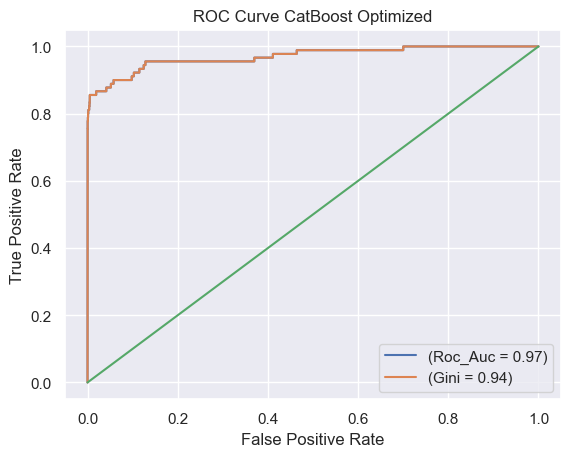

In [51]:
from sklearn.metrics import roc_curve

y_prob = optimized_model_cb.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost Optimized')

plt.legend(loc='lower right')
plt.show()

# XGB Model

In [52]:
xgb_clf = XGBxgb_clf = XGBClassifier()

In [54]:
xgb_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_xgb = evaluate(xgb_clf, X_test, y_test)

Model Performance
Gini prob is 91.70508566318365
[[56646    10]
 [   24    66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.87      0.73      0.80        90

    accuracy                           1.00     56746
   macro avg       0.93      0.87      0.90     56746
weighted avg       1.00      1.00      1.00     56746



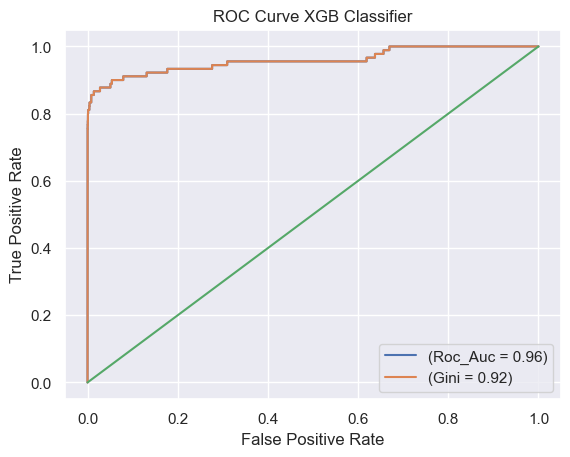

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = xgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()

# XGB Optimized

In [57]:
param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9],
    'subsample': np.linspace(0.5, 1, num=6), 
   
    'colsample_bytree': np.linspace(0.5, 1, num=6), 
    'gamma': [0, 1, 5]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 9],
 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'gamma': [0, 1, 5]}

In [58]:
random_search_xgb = RandomizedSearchCV(xgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,

In [59]:
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

Best Hyperparameters for XGB:  {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.5}


In [60]:
optimized_model_xgb = random_search_xgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)

Model Performance
Gini prob is 93.606070946688
[[56648     8]
 [   27    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.70      0.78        90

    accuracy                           1.00     56746
   macro avg       0.94      0.85      0.89     56746
weighted avg       1.00      1.00      1.00     56746



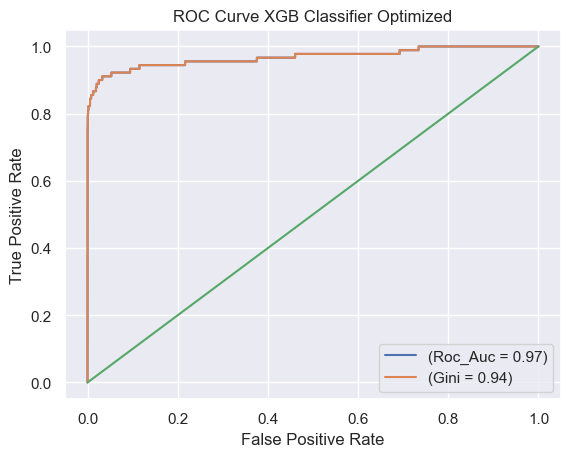

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model_xgb.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier Optimized')

plt.legend(loc='lower right')
plt.show()

# LGB Model

In [62]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 383, number of negative: 226597
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001687 -> initscore=-6.382893
[LightGBM] [Info] Start training from score -6.382893


LGBMClassifier()

In [63]:
result_lgb = evaluate(lgb_clf, X_test, y_test)

Model Performance
Gini prob is 64.6341272082588
[[56518   138]
 [   30    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.30      0.67      0.42        90

    accuracy                           1.00     56746
   macro avg       0.65      0.83      0.71     56746
weighted avg       1.00      1.00      1.00     56746



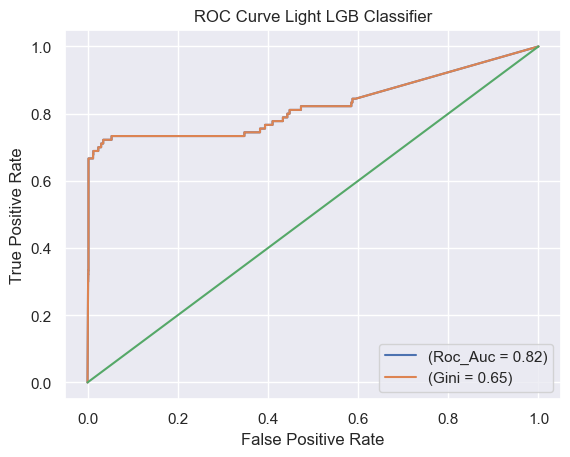

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = lgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light LGB Classifier')

plt.legend(loc='lower right')
plt.show()

# LGB Optimized

In [65]:

from sklearn.model_selection import RandomizedSearchCV


param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [66]:
random_search_lgb = RandomizedSearchCV(lgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 383, number of negative: 226597
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 226980, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001687 -> initscore=-6.382893
[LightGBM] [Info] Start training from score -6.382893


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=1, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [67]:
print("Best Hyperparameters for LGBM: ", random_search_lgb.best_params_)

Best Hyperparameters for LGBM:  {'num_leaves': 30, 'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01}


In [68]:
optimized_model_lgb = random_search_lgb.best_estimator_
optmized_accuracy_lgb = evaluate(optimized_model_lgb, X_test, y_test)

Model Performance
Gini prob is 89.54314929869153
[[56656     0]
 [   90     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


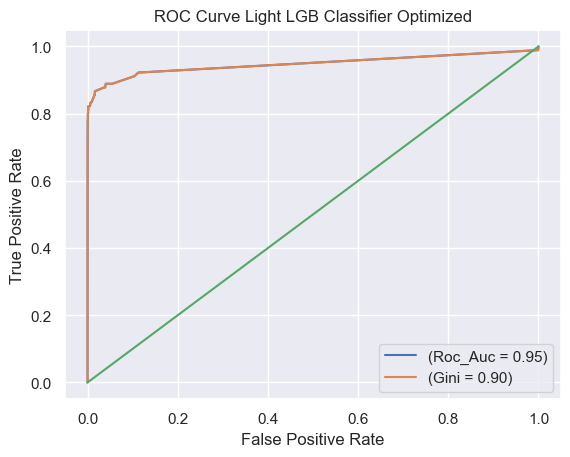

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model_lgb.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light LGB Classifier Optimized')

plt.legend(loc='lower right')
plt.show()

Catboost Optimized Model is best model for this model